# Class Probabilities with Logistic Regression

In spite of the 'regression' label above, the algorithm of logistic regression is a model for classification. This model exceeds when classifiying linearly separable classes. This model can also be extended for OvR situations using multiclass classification. 
Since logistic regression is very easy to implement it has become one of the most popular classification models in the industry. It performs very well on linearly separable classes.

**odds ratio** : the odds in favor of a particular event, written as $\frac{p}{\left(1-p\right)}$ where $p$ is the probability of the positive event.

**positive event** : refers to the event in which we want to predict.

### Logit Function

The logit function is helpful in mapping values from the range 0 to 1 into values spanning the real numbers, this is used to express a linear relationship between feature values and the log-odds. The logit function is defined as the natural log of the odds ratio $$logit\left(p\right) = log\frac{p}{\left(1-P\right)}.$$

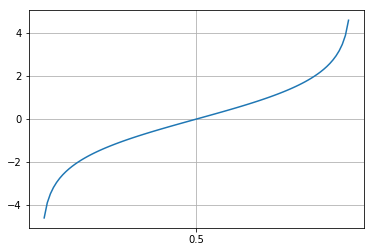

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
p = np.arange(0, 1, .01)

# red dashes, blue squares and green triangles
plt.plot(p, np.log(p/(1-p)))
# y axis ticks and gridline
plt.xticks([0.5])
plt.yticks([-4, -2, 0, 2, 4])

ax = plt.gca()
ax.xaxis.grid(True)
ax.yaxis.grid(True)

plt.show()

### Sigmoid Function

When we are interested in predicting the probability that a sample belongs to a certain class (which would be the inverse of the logit function) we use the logistic sigmoid function, often shortened to the sigmoid function. The sigmoid function maps any real number into the range of 0 to 1, this is immensely helpful for determining the probability of a sample belonging to a specific class. The sigmoid function is defined as $$\phi\left(z\right) = \frac{1}{1+e^{-z}},$$ where $z$ is the linear combination of all sample features and their respective weights $$z = w^Tx = w_0x_0 + w_1x_1 + \dots + w_mx_m.$$

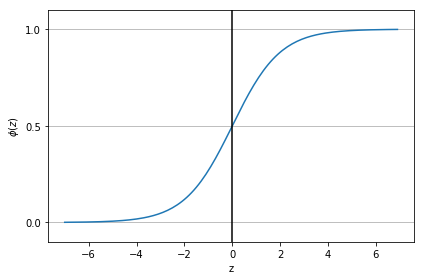

In [70]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
#plt.savefig('images/03_02.png', dpi=300)
plt.show()

If the input z is very large or even approaches infinity then the $sigmoid(z)$ will approach 1, the same is true for negative infinity however it will approach 0. The midpoint is 0, if $z=0$ then the $sigmoid(z)$ will be 0.5.

We can interpret the output of the sigmoid function to be the probability of a particular sample belonging to a certain class. For example, the probability of a particular sample belonging to class 1 would be expressed as the conditional probability $\phi\left(z\right) = P(y=1 | x;w)$.

The predicted probability can then be simply converted into a binary outcome via a threshold function: 
$$
    \hat{y} = \begin{cases} 
      1 & if \phi\left(z\right) \geq 0.5 \\
      0 & otherwise
   \end{cases}
$$

After considering the sigmoid function $\phi(z)$ and it's behavior we can simplify the threshold function to
$$
    \hat{y} = \begin{cases} 
      1 & if z \geq 0 \\
      0 & otherwise
   \end{cases}
$$

## Learning the Weights of the logistic cost function

The sigmoid function can describe the probability that a sample belongs to a particular class given $z$, and as mentioned before $z$ is the linear combination of a sample's features and their respective weights. This is expressed as 
$$z = w^Tx = w_0x_0 + w_1x_1 + \dots + w_mx_m.$$

To get the estimation from the sigmoid function we first need $z$ and thus need to define weights and the mechanisms for which they are changed in response to the data.

Our end goal is to maximize the likelyhood that a sample belongs to a particular class, in doing so we must defined a cost function to minimize. We will again use the sum-squared-error cost function 

$$J(w) = \frac{1}{2}\sum_{i} \left(y^\left(i\right) - \phi\left(z^\left(i\right)\right)  \right)^2.$$



Let us define the likelyhood that a sample belongs to class $y$ as 

$$L(w) = P(y | x;w) = \prod_{i=1}^{n} \left(\left(\phi(z^{(i)}\right)\right)^{y^{(i)}} \left(\left(1-\phi(z^{(i)}\right)\right)^{1-y^{(i)}} $$

This means that the probability that a sample belongs to class y will be the product of each feature's probability of belonging to the class multiplied by the probability that it does not belong to the class. 

After taking the natural log of the previous function and using numerical methodns, this will be adjusted and optimized for performance until finally reaching the function 
$$J(w) = \sum^{n}_{n=1}\left[-y^{(i)} log\left(\phi\left(z^{(i)}\right)\right) - \left(1-y^{(i)}\right) log\left(1-\phi\left(z^{(i)}\right)\right)   \right].$$
This defines the likelyhood that a sample belongs to class $y$.